# Import Libraries



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Get the Data


In [2]:
loan = pd.read_csv('loan_data.csv')

In [3]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
loan.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [5]:
loan.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# Exploratory Data Analysis

Let's do some data visualization! 

Creating a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.



Text(0.5, 0, 'FICO')

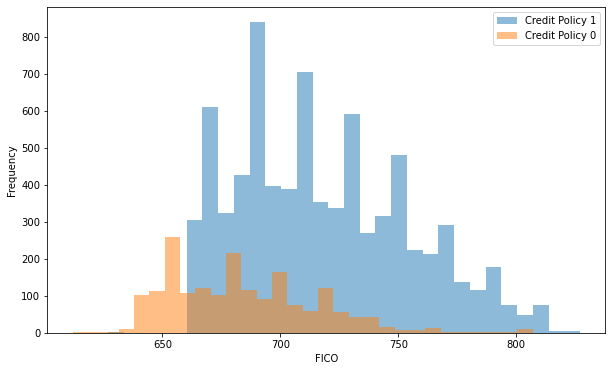

In [6]:
plt.figure(figsize = (10, 6))

loan[loan['credit.policy'] == 1]['fico'].plot.hist(alpha = 0.5, bins = 30, label = 'Credit Policy 1')
loan[loan['credit.policy'] == 0]['fico'].plot.hist(alpha = 0.5, bins = 30, label = 'Credit Policy 0')
plt.legend()
plt.xlabel('FICO')


** Creating a similar figure, except this time select by the not.fully.paid column.**

Text(0.5, 0, 'FICO')

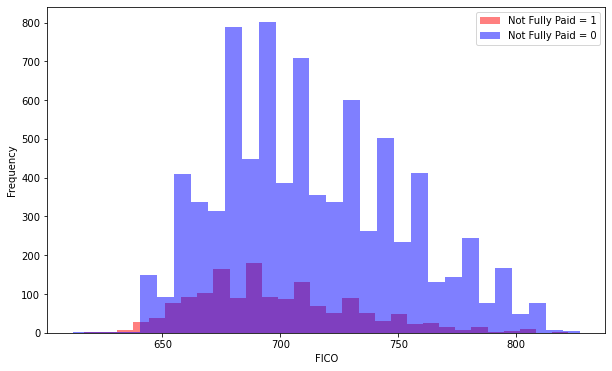

In [11]:
plt.figure(figsize = (10, 6))
loan[loan['not.fully.paid'] == 1]['fico'].plot.hist(alpha = 0.5, bins = 30, label = 'Not Fully Paid = 1', color = 'red')
loan[loan['not.fully.paid'] == 0]['fico'].plot.hist(alpha = 0.5, bins = 30, label = 'Not Fully Paid = 0', color = 'blue')
plt.legend()
plt.xlabel('FICO')

** Creating a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid. **

<AxesSubplot:xlabel='purpose', ylabel='count'>

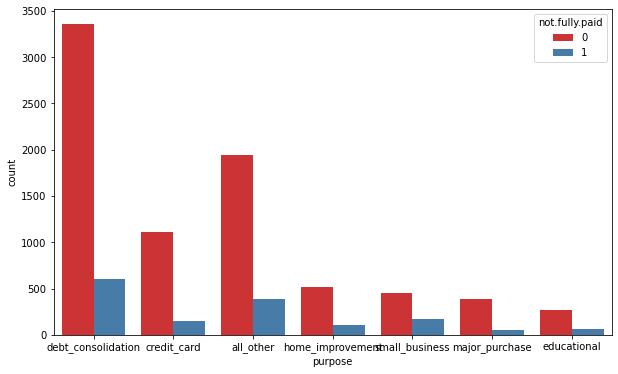

In [16]:
plt.figure(figsize = (10, 6))
sns.countplot(x = 'purpose',hue = 'not.fully.paid', data = loan, palette = 'Set1')

** Let's see the trend between FICO score and interest rate.**

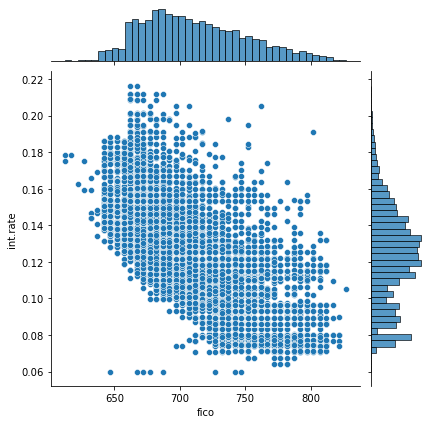

In [17]:
sns.jointplot(x = 'fico', y='int.rate', data = loan)

** Creating following lmplots to see if the trend differed between not.fully.paid and credit.policy.**

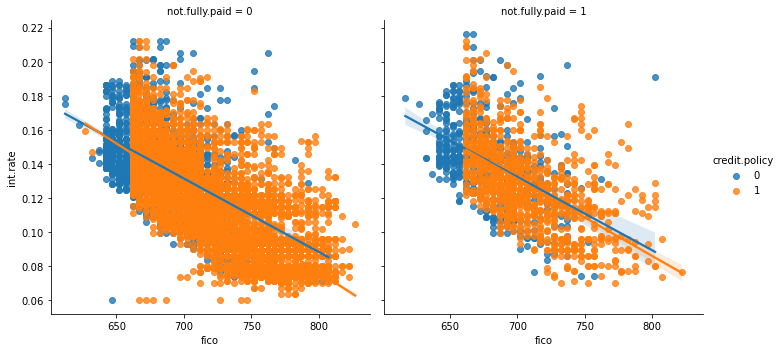

In [18]:
sns.lmplot(x = 'fico', y = 'int.rate', data = loan, hue = 'credit.policy', col = 'not.fully.paid')

# Setting up the Data

Let's get ready to set up our data for our Random Forest Classification Model!



In [19]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Categorical Features

Notice that the **purpose** column as categorical

That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies.


In [20]:
cat_feats = ['purpose']

In [22]:
final_data = pd.get_dummies(loan, columns = cat_feats, drop_first=True)

In [23]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


## Train Test Split

Now its time to split our data into a training set and a testing set!



In [26]:
from sklearn.model_selection import train_test_split
X = final_data.drop('not.fully.paid', axis = 1)
y = final_data['not.fully.paid']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Training a Decision Tree Model

Let's start by training a single decision tree first!

** Import DecisionTreeClassifier**

In [28]:
from sklearn.tree import DecisionTreeClassifier

**Creating an instance of DecisionTreeClassifier() called dtree and fit it to the training data.**

In [29]:
dtree = DecisionTreeClassifier()

In [30]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

## Predictions and Evaluation of Decision Tree
**Create predictions from the test set and create a classification report and a confusion matrix.**

In [31]:
pred = dtree.predict(X_test)

In [32]:
from sklearn.metrics import confusion_matrix, classification_report

In [33]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      2650
           1       0.21      0.22      0.22       511

    accuracy                           0.74      3161
   macro avg       0.53      0.53      0.53      3161
weighted avg       0.75      0.74      0.74      3161



In [34]:
print(confusion_matrix(y_test, pred))

[[2233  417]
 [ 399  112]]


## Training the Random Forest model

Now its time to train our model!

**Creating an instance of the RandomForestClassifier class and fit it to our training data**

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rforest = RandomForestClassifier()

In [38]:
rforest.fit(X_train, y_train)

RandomForestClassifier()

## Predictions and Evaluation

Let's predict off the y_test values and evaluate our model.



In [39]:
pred2 = rforest.predict(X_test)

In [40]:
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2650
           1       0.37      0.02      0.04       511

    accuracy                           0.84      3161
   macro avg       0.61      0.51      0.47      3161
weighted avg       0.76      0.84      0.77      3161



**The Confusion Matrix for the predictions.**

In [41]:
print(confusion_matrix(y_test, pred2))

[[2633   17]
 [ 501   10]]
